# Project: Data Jobs.
### In this notebook, we'll study the "Data Jobs" dataset. We will build two predictive models, one based on logistic regression, and the other one based on SVM. At the end, we'll compare results in order to select the better one.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Loading the dataset.

In [2]:
path = '/content/drive/MyDrive/Machine Learning - Proyectos/Proyectos/Project - Data Science Job/data_science_job.csv'

### Libraries needed.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

### Setting of graphics:

In [4]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

### Creating the main DataFrame:

In [5]:
df = pd.read_csv(path)

In [6]:
df.head(10)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0
5,21651,city_176,0.764,NaN,Has relevent experience,Part time course,Graduate,STEM,11.0,NaN,NaN,24.0,1.0
6,28806,city_160,0.920,Male,Has relevent experience,no_enrollment,High School,NaN,5.0,50-99,Funded Startup,24.0,0.0
7,402,city_46,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13.0,<10,Pvt Ltd,18.0,1.0
8,27107,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,7.0,50-99,Pvt Ltd,46.0,1.0
9,699,city_103,0.920,NaN,Has relevent experience,no_enrollment,Graduate,STEM,17.0,10000+,Pvt Ltd,123.0,0.0


## Some immediate graphics to get an initial idea:

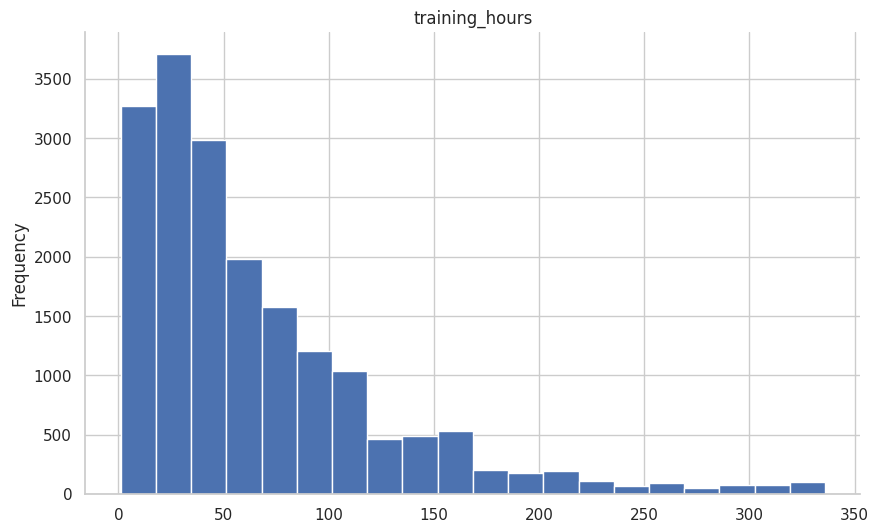

In [7]:
# @title training_hours

from matplotlib import pyplot as plt
df['training_hours'].plot(kind='hist', bins=20, title='training_hours')
plt.gca().spines[['top', 'right',]].set_visible(False)

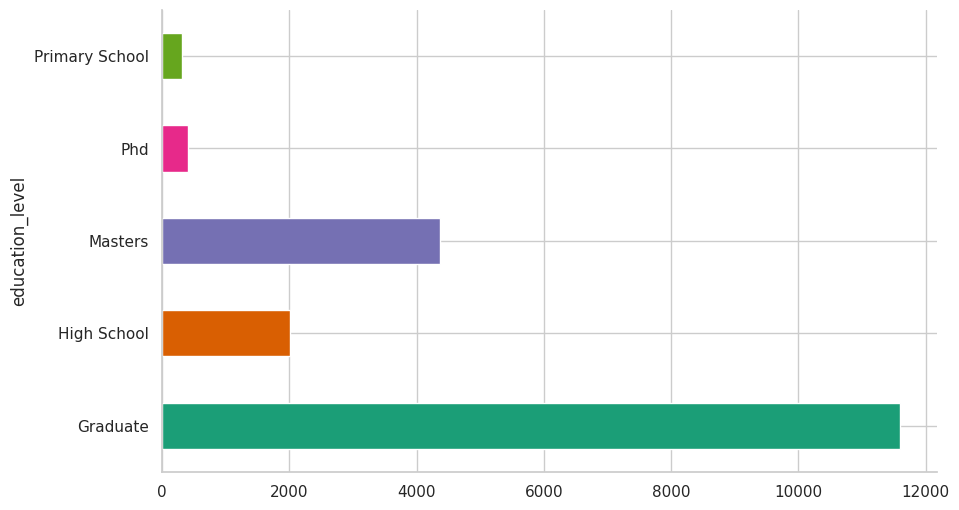

In [8]:
# @title education_level

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('education_level').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

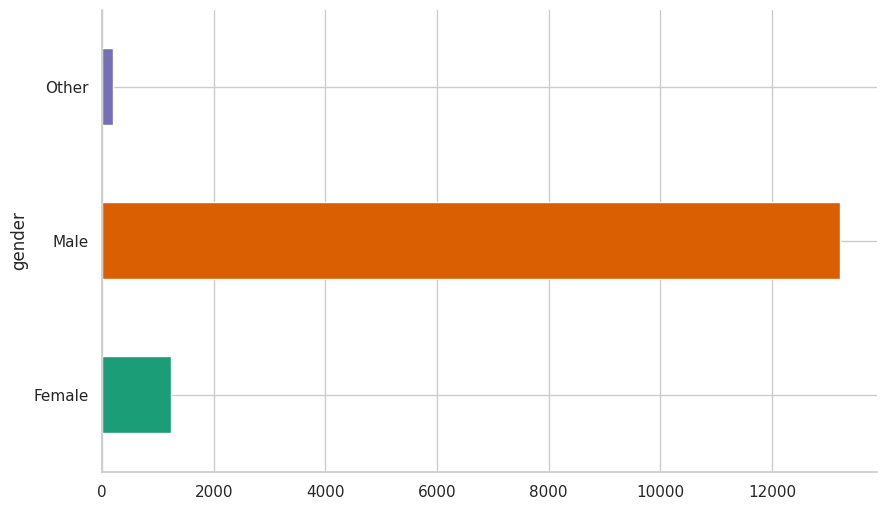

In [9]:
# @title gender

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('gender').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [10]:
df.shape

(19158, 13)

In [11]:
df.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'training_hours', 'target'],
      dtype='object')

### General information and descriptive statistics:

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  18679 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  float64
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  training_hours          18392 non-null  float64
 12  target                  19158 non-null  float64
dtypes: float64(4), int64(1), object(8)
memory usage: 1.9+ MB


In [13]:
print(df.describe())

        enrollee_id  city_development_index    experience  training_hours  \
count  19158.000000            18679.000000  19093.000000    18392.000000   
mean   16875.358179                0.828951      9.928036       65.185787   
std     9616.292592                0.123334      6.505268       59.885626   
min        1.000000                0.448000      0.000000        1.000000   
25%     8554.250000                0.740000      4.000000       23.000000   
50%    16982.500000                0.903000      9.000000       47.000000   
75%    25169.750000                0.920000     16.000000       88.000000   
max    33380.000000                0.949000     20.000000      336.000000   

             target  
count  19158.000000  
mean       0.249348  
std        0.432647  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000  


In [14]:
print(df.describe(include='all'))

         enrollee_id      city  city_development_index gender  \
count   19158.000000     19158            18679.000000  14650   
unique           NaN       123                     NaN      3   
top              NaN  city_103                     NaN   Male   
freq             NaN      4355                     NaN  13221   
mean    16875.358179       NaN                0.828951    NaN   
std      9616.292592       NaN                0.123334    NaN   
min         1.000000       NaN                0.448000    NaN   
25%      8554.250000       NaN                0.740000    NaN   
50%     16982.500000       NaN                0.903000    NaN   
75%     25169.750000       NaN                0.920000    NaN   
max     33380.000000       NaN                0.949000    NaN   

            relevent_experience enrolled_university education_level  \
count                     19158               18772           18698   
unique                        2                   3               5   
top   

### Variable `target` distribution:

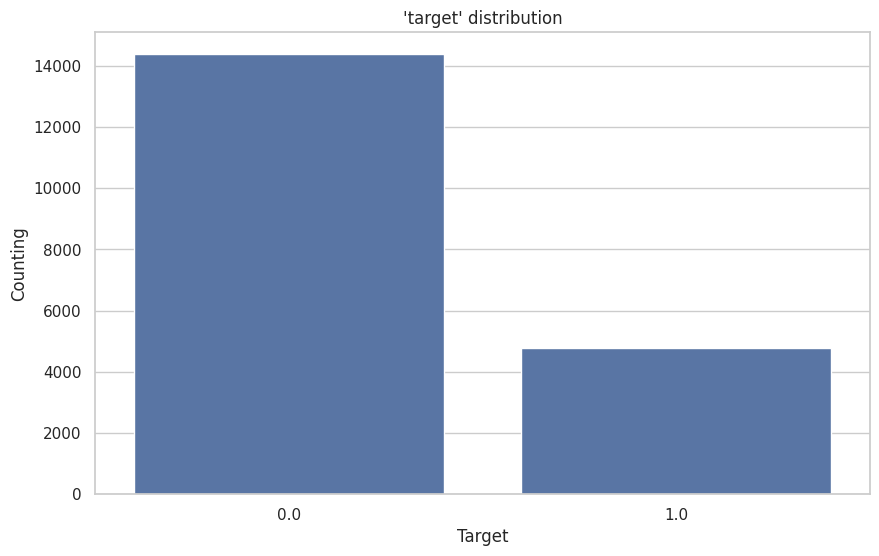

In [15]:
plt.figure()
sns.countplot(x = 'target', data = df)
plt.title("'target' distribution")
plt.xlabel("Target")
plt.ylabel("Counting")
plt.show()

# Problem solving related to missing values:





### Number of rows with at least one NaN.

In [16]:
num_filas_nan = df.isnull().any(axis = 1).sum()
print("Number of rows with at least one NaN:", num_filas_nan)

Number of rows with at least one NaN: 10724


### Overall NaN values for each field (column):

In [17]:
print(df.isnull().sum())

enrollee_id                  0
city                         0
city_development_index     479
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
training_hours             766
target                       0
dtype: int64


In [18]:
df.duplicated().sum() # Número de filas duplicadas

0

### Identifying categorical columns to encode:

In [19]:
categorical_cols = ['city', 'gender', 'relevent_experience',
                    'enrolled_university', 'education_level',
                    'major_discipline', 'company_size', 'company_type']

### In categorical columns, conversion of NaN to 'unknown'.

In [20]:
for cat in categorical_cols:
    df[cat] = df[cat].fillna('unknown')

### Conversion of categorical variables to dummy variables.

In [21]:
df = pd.get_dummies(df, columns = categorical_cols, drop_first = True)
print("\nShape of the dataset after conversion:", df.shape)


Shape of the dataset after conversion: (19158, 159)


### Delete the columns that we'll not use for the model.

In [22]:
df = df.drop(['enrollee_id'], axis=1)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Columns: 158 entries, city_development_index to company_type_unknown
dtypes: bool(154), float64(4)
memory usage: 3.4 MB


### Let's fill the NaN values on numeric fields with the mean.

In [24]:
numeric_cols = ['city_development_index','experience','training_hours']

In [25]:
for cat in numeric_cols:
    df[cat] = df[cat].fillna(df[cat].mean())

In [26]:
len(df.columns)

158

# Applying PCA:

### Data scaling:

In [27]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

### Let´s find out the optimal number of principal components:

In [28]:
for i in range(2, 13):
    pca = PCA(n_components = i)
    data_pca = pca.fit_transform(data_scaled)
    df_pca = pd.DataFrame(data_pca)
    list_pca = df_pca.columns.tolist()
    X = df_pca[list_pca]
    y = df['target']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)
    model = LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs', max_iter = 1000, random_state = 42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Precisión del modelo con {i} componentes principales: {accuracy * 100:.2f}%")

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' w

Precisión del modelo con 2 componentes principales: 82.18%
Precisión del modelo con 3 componentes principales: 83.25%
Precisión del modelo con 4 componentes principales: 85.39%


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' w

Precisión del modelo con 5 componentes principales: 87.37%
Precisión del modelo con 6 componentes principales: 86.87%
Precisión del modelo con 7 componentes principales: 87.45%


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' w

Precisión del modelo con 8 componentes principales: 87.66%
Precisión del modelo con 9 componentes principales: 88.05%
Precisión del modelo con 10 componentes principales: 87.87%
Precisión del modelo con 11 componentes principales: 87.92%
Precisión del modelo con 12 componentes principales: 88.15%


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(


### Applying PCA using `n` principal components:

In [29]:
n = 9
pca = PCA(n_components = n)
data_pca = pca.fit_transform(data_scaled)

### Conversion to a DataFrame to visualize what we are doing:

In [30]:
df_pca = pd.DataFrame(data_pca)
print(df_pca.head())

          0         1         2         3         4         5         6  \
0  0.317770  0.616539  3.211196  0.405972 -1.056896 -0.445847  0.353814   
1 -1.192174 -0.222115 -0.938044  0.907831  0.194083  0.903951 -0.603638   
2  2.987336 -2.993131  0.590584 -1.066815 -0.082584 -0.282540 -0.349417   
3  3.273566 -1.576570 -1.028342 -2.289314 -0.363174 -1.219624  0.617789   
4 -1.810446 -0.348114  0.451365  0.458011  0.627957  3.954700  0.050303   

          7         8  
0 -0.091932  0.925023  
1 -0.544592  0.789912  
2 -0.613449 -0.031463  
3  1.434940  2.725780  
4 -0.332770  0.068135  


In [31]:
list_pca = df_pca.columns.tolist()
list_pca

[0, 1, 2, 3, 4, 5, 6, 7, 8]

# Separating caracteristics (X) and target variable (y).

In [32]:
X = df_pca[list_pca]
y = df['target']

In [33]:
print("Data entry examples:")
X.head()

Data entry examples:


,0,1,2,3,4,5,6,7,8
0,0.317770,0.616539,3.211196,0.405972,-1.056896,-0.445847,0.353814,-0.091932,0.925023
1,-1.192174,-0.222115,-0.938044,0.907831,0.194083,0.903951,-0.603638,-0.544592,0.789912
2,2.987336,-2.993131,0.590584,-1.066815,-0.082584,-0.282540,-0.349417,-0.613449,-0.031463
3,3.273566,-1.576570,-1.028342,-2.289314,-0.363174,-1.219624,0.617789,1.434940,2.725780
4,-1.810446,-0.348114,0.451365,0.458011,0.627957,3.954700,0.050303,-0.332770,0.068135


In [34]:
print("target variable:")
y.head()

target variable:


,target
0,1.0
1,0.0
2,0.0
3,1.0
4,0.0


### Training and testing sets:

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

In [36]:
print("\nShape of the sets:")
print(f"Trainning: {X_train.shape}, Testing: {X_test.shape}")


Shape of the sets:
Trainning: (15326, 9), Testing: (3832, 9)


### Classification model: first, let's use logistic regression.

In [37]:
model = LogisticRegression(max_iter = 1000, random_state = 42)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

# Evaluating the model.

In [38]:
y_pred = model.predict(X_test)

# Results:

In [39]:
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel accuracy: {accuracy * 100:.2f}%")


Model accuracy: 88.05%


In [40]:
print("\nClassification report:")
print(classification_report(y_test, y_pred))


Classification report:
              precision    recall  f1-score   support

         0.0       0.91      0.94      0.92      2877
         1.0       0.79      0.71      0.75       955

    accuracy                           0.88      3832
   macro avg       0.85      0.82      0.83      3832
weighted avg       0.88      0.88      0.88      3832



In [41]:
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion matrix:
[[2693  184]
 [ 274  681]]


In [42]:
y_train_pred = model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

In [43]:
train_accuracy

0.8743964504763148

In [44]:
y_test_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

In [45]:
test_accuracy

0.8804801670146137

In [46]:
scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

In [47]:
scores

array([0.87108559, 0.88308977, 0.86821503, 0.87679457, 0.87679457])

Note: As we can see, comparing `train_accuracy` and `test_accuracy`, and `scores`, then we observe consistency in our model.

### Confusion matrix visualization:

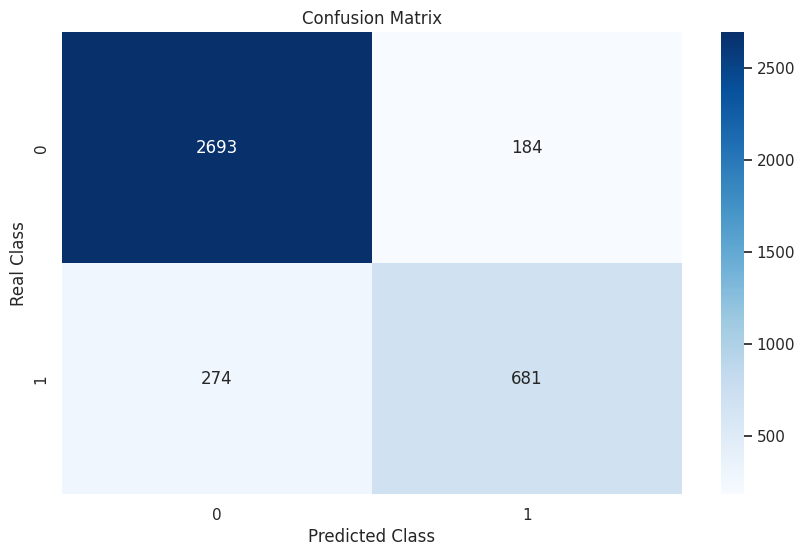

In [48]:
plt.figure()
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt = "d", cmap = "Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Real Class")
plt.show()

# Now we are going to use SVM.

In [49]:
from sklearn.svm import SVC
model_2 = SVC(kernel = 'rbf', C = 1.0, gamma = 'scale', random_state = 42)
model_2.fit(X_train, y_train)

SVC(random_state=42)

### Evaluating the model:

In [50]:
y_pred_svm = model_2.predict(X_test)

In [51]:
accuracy = accuracy_score(y_test, y_pred_svm)
print(f"\nModel accuracy: {accuracy * 100:.2f}%")


Model accuracy: 94.49%


In [52]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm))


Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.98      0.96      2877
         1.0       0.93      0.84      0.88       955

    accuracy                           0.94      3832
   macro avg       0.94      0.91      0.92      3832
weighted avg       0.94      0.94      0.94      3832



In [53]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))

Confusion Matrix:
[[2819   58]
 [ 153  802]]


In [54]:
y_train_pred_2 = model_2.predict(X_train)
train_accuracy_2 = accuracy_score(y_train, y_train_pred_2)

In [55]:
train_accuracy_2

0.945321675583975

In [56]:
y_test_pred_2 = model_2.predict(X_test)
test_accuracy_2 = accuracy_score(y_test, y_test_pred_2)

In [57]:
test_accuracy_2

0.944937369519833

In [58]:
scores_2 = cross_val_score(model_2, X, y, cv = 5, scoring = 'accuracy')

In [59]:
scores_2

array([0.94128392, 0.94258873, 0.93397704, 0.94179066, 0.94100757])

Note: As before we can see, comparing `train_accuracy` and `test_accuracy`, and `scores`, then we observe consistency in our second model.

### Confusion matrix visualization (second case of course):

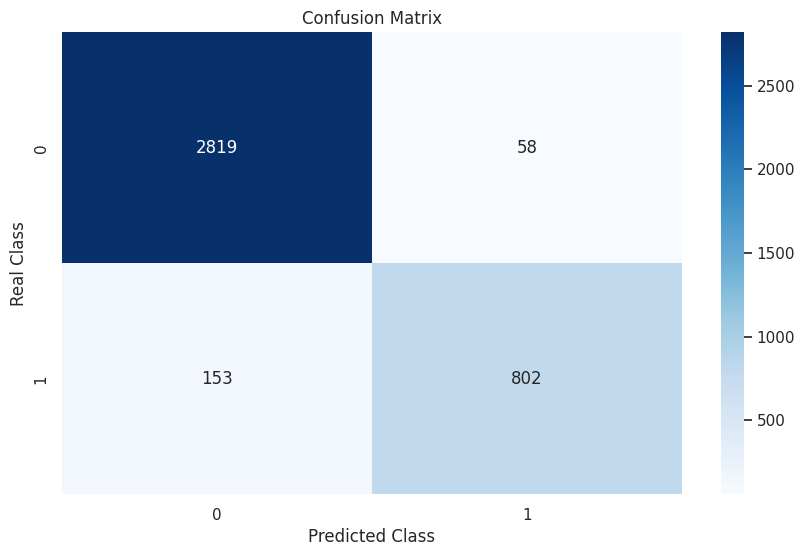

In [60]:
plt.figure()
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot = True, fmt = "d", cmap = "Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("Real Class")
plt.show()

# Conclusion:
### All results show that both models are good, but the model built with SVM was better.